<a href="https://colab.research.google.com/github/LPapakostas/Deep_Learning_Projects/blob/master/Classifying_images_to_numbers_using_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classify images to numbers from 1-10

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


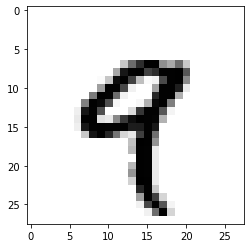

In [3]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


First, we will present our neural network with the training data, **train_images** and **train_labels**. The network then will learn to assosiate images and labels. Finally, we will ask the network to produce the predictions for **test_images**, and then we will verify if these predictions match the labels from **test_labels**.


In [0]:
from tensorflow.keras import models,layers

In [5]:
network = models.Sequential([ layers.Dense(512, activation='relu', input_shape=(28 * 28,) )  , layers.Dense(10, activation='softmax') ])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Our network consists of a sequence of 2 *Dense* layers , which are full-connected neural layers.
The last layer is a 10-way "softmax" layer that will return the probability that the current digit image belongs to one of 10 classes (0-10 digit).

In [0]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Before training, we will preprocess our data by reshaping it into the shape that the
network expects, and scaling it so that all values are in the [0, 1] interval. 

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2551 - acc: 0.9259
Epoch 2/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1048 - acc: 0.9695
Epoch 3/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0686 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0508 - acc: 0.9848
Epoch 5/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0369 - acc: 0.9894


In [10]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.0709 - acc: 0.9780
test_acc: 0.978
